<a href="https://colab.research.google.com/github/marcinmichalsmolen/wum2022/blob/main/WUM_Optymalizator_funkcja_straty_i_early_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science z Python 3.10. Optymalizator, funkcja straty i early stopping


Poniżej przedstawiony jest kod znany z poprzednich zajęć. Tym razem wprowadzimy do niego "ulepszenia" i zastanowimy się nad właściwym optymalizatorem i funkcją straty. Wprowadzimy również do naszego modelu podstawowy Early Stopping, który będzie zapobiegać przeuczeniu się naszego modelu.

### 1. Import bibliotek
#### 🇬🇧 Import libraries
W tym miejscu importujemy biblioteki, które będą nam potrzebne do wytrenowania sieci neuronowej. Jeżeli w tym miejscu widoczny będzie błąd, to konieczne jest zainstalowanie biblioteki w danym środowisku. W takim wypadku wchodzimy w terminal, aktywujemy środowisko pracy, instalujemy biblioteki (pip install X).

In [1]:
!pip install mnist

import tensorflow as tf
import numpy as np
import mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical

from tensorflow import keras
from tensorflow.keras import backend as K

# Rozpoczynamy od importu potrzebnych nam bibliotek, nowością jest EarlyStopping

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 2. Przygotowanie danych do analizy
#### 🇬🇧 Data preparation

In [2]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

Zatrzymajmy się na chwilę w tym miejscu. Na ostatnich zajęciach modyfikowaliśmy architekturę sieci neuronowej. Teraz przyszedł czas na wybór odpowiedniego optymalizatora, metryk oraz funkcji straty.

In [3]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### 3. Trenowanie modelu
#### 🇬🇧 Model training

### 📚 Zadanie 1.
##### Przeprowadź proces uczenia się z wykorzystaniem early stopping, wykonaj poniższe kroki.

1. Stwórz nową zmienną, którą nazwiesz f1, odwołaj się do early stopping, wprowadź odpowiednie wartości do parametrów takich jak monitor, mode, verbose oraz patience.
2. Stwórz nową zmienną, którą nazwiesz f1, odwołaj się do ModelCheckpoint, wprowadź nazwę dla swojego modelu oraz odpowiednie wartości dla parametru monitor, mode, verbose oraz save_best_only.
3. Stwórz nową zmienną, którą nazwiesz history. Zmienna ta powinna zawierać stworzone w poprzednim kroku dane treningowe (x), etykiety danych trningowych (y), dane testowe (a), etykiedy danych testowych (b) oraz odpowiednie wartości parametrów epochs oraz verbose.
4. Stwórz nową zmienną, którą nazwiesz trained_model, załaduj model używając nazwy modelu z punktu drugiego.
5. Stwórz nową zmienną, którą nazwiesz trai _accuracy, odwołaj się do trained_model.evaluate, użyj danych treningowych (x) oraz etykiet danych treningowych (y).
6. Stwórz nową zmienną, którą nazwiesz test_accuracy, odwołaj się do trained_model.evaluate, użyj danych testowych (a) oraz etykiet danych testowych (b).
7. Przeprowadź uczenie sieci dla liczby epok wynoszącej 100 przy wartości parametru patience wynoszącej 10. Po której epoce proces trenowania sieci się zatrzyma?
8. Wyświetl informacje dotyczące dokładności klasyfikacji na materiale treningowym oraz testowym.

In [5]:
from matplotlib import pyplot
def summarize_diagnostics(history):
  pyplot.title('Dokładność klasyfikacji')
  pyplot.plot(history.history['accuracy'], color='orange', label='train')
  pyplot.subplots_adjust (right=2)
  pyplot.show()

Epoch 1/10
2000/2000 [==============================] - 9s 3ms/step - loss: 0.3520 - accuracy: 0.8939
Epoch 2/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1827 - accuracy: 0.9447
Epoch 3/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1398 - accuracy: 0.9578
Epoch 4/10
2000/2000 [==============================] - 5s 3ms/step - loss: 0.1199 - accuracy: 0.9624
Epoch 5/10
2000/2000 [==============================] - 5s 2ms/step - loss: 0.1042 - accuracy: 0.9678
Epoch 6/10
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0945 - accuracy: 0.9707
Epoch 7/10
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0830 - accuracy: 0.9743
Epoch 8/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0779 - accuracy: 0.9756
Epoch 9/10
2000/2000 [==============================] - 5s 3ms/step - loss: 0.0724 - accuracy: 0.9765
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.1186 

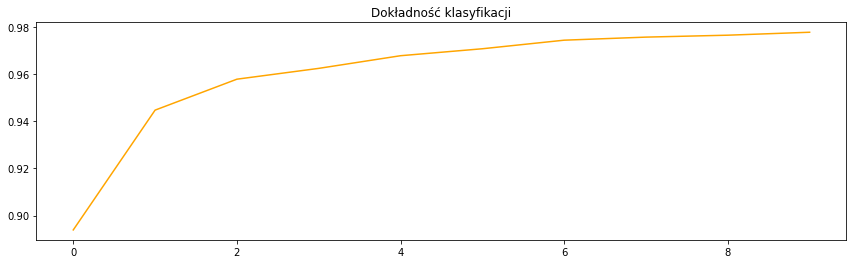

In [6]:
# Z 1.1
f1 = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=0, patience=3, mode="auto")

# Z 1.2
f2 = tf.keras.callbacks.ModelCheckpoint(filepath='modelx', save_weights_only = False, monitor = 'accuracy', mode='max', save_best_only = True)
f3 = tf.keras.callbacks.TensorBoard(log_dir='./logs')

# Z 1.3
history = model.fit(train_images,  to_categorical(train_labels),  epochs=10, batch_size = 30,  callbacks = [f1,f2,f3])

# Z 1.4
trained_model = keras.models.load_model('modelx')

# Z 1.5-1.6
train_accuracy = trained_model.evaluate(train_images, to_categorical(train_labels))
test_accuracy = trained_model.evaluate(test_images, to_categorical(test_labels))

# Z 1.7
print(train_accuracy + test_accuracy)

# Osobno dla train i test
print('Dokładności klasyfikacji na materiale treningowym  = ',train_accuracy)
print('dokładności klasyfikacji na materiale testowym  = ',test_accuracy)
summarize_diagnostics(history)


Epoch 1/100
2000/2000 [==============================] - 5s 3ms/step - loss: 0.0620 - accuracy: 0.9800
Epoch 2/100
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0577 - accuracy: 0.9820
Epoch 3/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0547 - accuracy: 0.9817
Epoch 4/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0532 - accuracy: 0.9826
Epoch 5/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0504 - accuracy: 0.9836
Epoch 6/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0480 - accuracy: 0.9841
Epoch 7/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0456 - accuracy: 0.9845
Epoch 8/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0420 - accuracy: 0.9859
Epoch 9/100
2000/2000 [==============================] - 5s 3ms/step - loss: 0.0395 - accuracy: 0.9865
Epoch 10/100
2000/2000 [==============================] - 4s 2ms/step - l

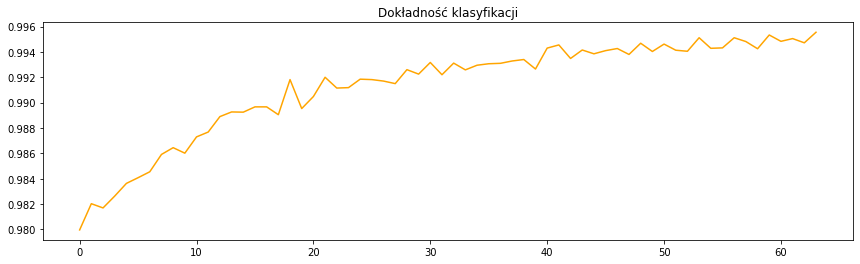

In [7]:
# Zadanie 1.7 Uczenie dla 100 epok
f1 = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=0, patience=10, mode="auto")
f2 = tf.keras.callbacks.ModelCheckpoint(filepath='modelz', save_weights_only = False, monitor = 'accuracy', mode='max', save_best_only = True)
f3 = tf.keras.callbacks.TensorBoard(log_dir='./logs')
historyz = model.fit(train_images,  to_categorical(train_labels),  epochs=100, batch_size = 30,  callbacks = [f1,f2,f3])
trained_modelz = keras.models.load_model('modelz')
train_accuracy = trained_modelz.evaluate(train_images, to_categorical(train_labels))
test_accuracy = trained_modelz.evaluate(test_images, to_categorical(test_labels))

print(train_accuracy + test_accuracy)
print('Dokładności klasyfikacji na materiale treningowym  = ',train_accuracy)
print('dokładności klasyfikacji na materiale testowym  = ',test_accuracy)
summarize_diagnostics(historyz)


### 📚 Zadanie 2.
##### Uruchom ponownie proces treningu sieci, tym razem wprowadzając zmianę związaną z funkcją straty oraz optymalizatora.

1. Wypróbuj inną funkcję straty (rozkład Poisona). Czy w przypadku naszego zbioru danych taka funkcja ma sens?
2. Wypróbuj inny optymalizator (z wykorzystaniem algorytmu Adadelta). Czy obserwujesz jakieś zmiany w procesie uczenia się w porównaniu do algorytmu wykorzystanego w tutorialu (adam)? Gdzie może leżeć przyczyna tych różnic? (zob. https://keras.io/api/optimizers/adadelta).

In [8]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

model2 = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])
model3 = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [9]:
model2.compile(
  optimizer='adam',
  loss='Poisson',
  metrics=['accuracy'],
)

In [10]:
tf.keras.optimizers.Adadelta(
    learning_rate=0.001, rho=0.95, epsilon=1e-07, name="Adadelta")
model3.compile(
  optimizer='Adadelta',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

Epoch 1/100
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1357 - accuracy: 0.8930
Epoch 2/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.1186 - accuracy: 0.9436
Epoch 3/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.1146 - accuracy: 0.9553
Epoch 4/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.1124 - accuracy: 0.9617
Epoch 5/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.1108 - accuracy: 0.9656
Epoch 6/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.1095 - accuracy: 0.9700
Epoch 7/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.1086 - accuracy: 0.9726
Epoch 8/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.1078 - accuracy: 0.9747
Epoch 9/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.1074 - accuracy: 0.9760
Epoch 10/100
2000/2000 [==============================] - 5s 2ms/step - l

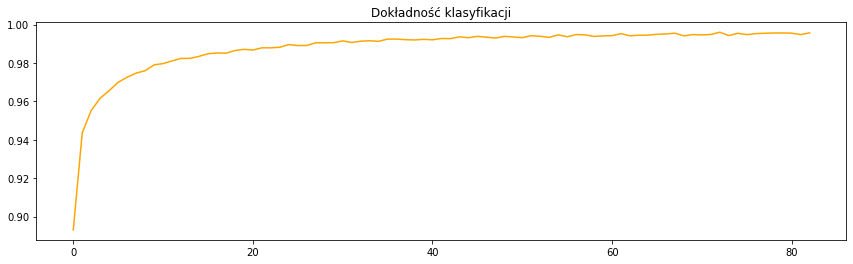

In [11]:
# Zadanie 2.1 
f1 = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=0, patience=10, mode="auto")
f2 = tf.keras.callbacks.ModelCheckpoint(filepath='modely', save_weights_only = False, monitor = 'accuracy', mode='max', save_best_only = True)
f3 = tf.keras.callbacks.TensorBoard(log_dir='./logs')
history2 = model2.fit(train_images,  to_categorical(train_labels),  epochs=100, batch_size = 30,  callbacks = [f1,f2,f3])
trained_model2 = keras.models.load_model('modely')
train_accuracy = trained_model2.evaluate(train_images, to_categorical(train_labels))
test_accuracy = trained_model2.evaluate(test_images, to_categorical(test_labels))

print(train_accuracy + test_accuracy)
print('Dokładności klasyfikacji na materiale treningowym  = ',train_accuracy)
print('dokładności klasyfikacji na materiale testowym  = ',test_accuracy)
summarize_diagnostics(history2)

# Wydaje mi się, że dla zbioru mnist funkcja straty przyjmująca wartości rzeczywiste z przedziału (0, 1) nie za bardzo ma sens


Epoch 1/100
2000/2000 [==============================] - 5s 2ms/step - loss: 2.2550 - accuracy: 0.1744
Epoch 2/100
2000/2000 [==============================] - 5s 2ms/step - loss: 2.1323 - accuracy: 0.3359
Epoch 3/100
2000/2000 [==============================] - 5s 3ms/step - loss: 2.0136 - accuracy: 0.4302
Epoch 4/100
2000/2000 [==============================] - 5s 3ms/step - loss: 1.8905 - accuracy: 0.5120
Epoch 5/100
2000/2000 [==============================] - 5s 3ms/step - loss: 1.7716 - accuracy: 0.5717
Epoch 6/100
2000/2000 [==============================] - 5s 3ms/step - loss: 1.6590 - accuracy: 0.6137
Epoch 7/100
2000/2000 [==============================] - 5s 3ms/step - loss: 1.5518 - accuracy: 0.6461
Epoch 8/100
2000/2000 [==============================] - 5s 2ms/step - loss: 1.4513 - accuracy: 0.6726
Epoch 9/100
2000/2000 [==============================] - 5s 2ms/step - loss: 1.3587 - accuracy: 0.6977
Epoch 10/100
2000/2000 [==============================] - 6s 3ms/step - l

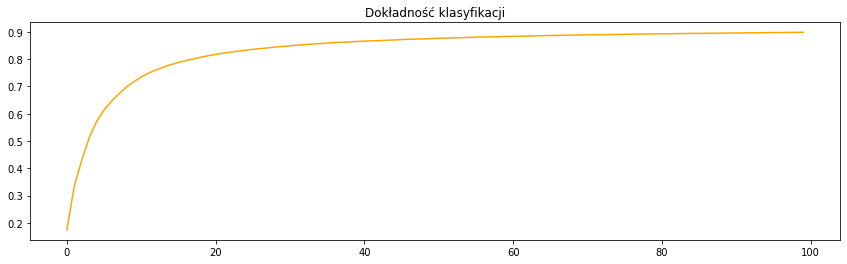

In [12]:
# Zadanie 2.2 
f1 = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=0, patience=10, mode="auto")
f2 = tf.keras.callbacks.ModelCheckpoint(filepath='modelw', save_weights_only = False, monitor = 'accuracy', mode='max', save_best_only = True)
f3 = tf.keras.callbacks.TensorBoard(log_dir='./logs')
history3 = model3.fit(train_images,  to_categorical(train_labels),  epochs=100, batch_size = 30,  callbacks = [f1,f2,f3])
trained_model3 = keras.models.load_model('modelw')
train_accuracy = trained_model3.evaluate(train_images, to_categorical(train_labels))
test_accuracy = trained_model3.evaluate(test_images, to_categorical(test_labels))

print(train_accuracy + test_accuracy)
print('Dokładności klasyfikacji na materiale treningowym  = ',train_accuracy)
print('dokładności klasyfikacji na materiale testowym  = ',test_accuracy)
summarize_diagnostics(history3)

# Przy wykorzystaniu algorytmu adaptacyjnego Adadelta model uczy się wolniej. Wykorzystałem dodatkowe parametry algorytmu Adadelta ze strony https://keras.io/api/optimizers/adadelta/.
# Możliwe, że dzięki ich modyfikacji możliwe są lepsze rezultaty. Adam jest najwydajniejszym jest efektywniejszym algorytmem - zapoznałem się z https://arxiv.org/pdf/1412.6980.pdf


### 📚 Zadanie 3.
##### Niekiedy przydaje nam się możliwość wprowadzenia modyfikacji do funkcji straty lub zbudowania własnej funkcji straty od postaw. W Keras/Tensorflow jest to dosyć prosta rzecz, którą możemy zrealizować za pomocą podstawowych operacji.

Poniższy przykład ilustruje w jaki sposób możemy skorzystać z funkcji straty Root Mean Square Error (RMSE) dla dwóch zmiennych (y_true i y_pred).

In [13]:
y_true = 43.2
y_pred = 4.2

In [14]:
x = tf.keras.metrics.RootMeanSquaredError()
x(y_true, y_pred).numpy()

39.0

Czasami jednak możemy chcieć stworzyć naszą własną funkcję straty (podajemy przy tym dwa argumenty, tj. y_true oraz y_pred).

In [15]:
import math
def custom_loss_function(y_true, y_pred):
  MSE = np.square(np.subtract(y_true,y_pred)).mean() 
  RMSE = math.sqrt(MSE)
#  print("Root Mean Square Error:\n")
#  print(RMSE)
  return(RMSE)
  

In [16]:
custom_loss_function(43.2, 4.2)

39.0

Odtwórz wskazaną wcześniej funkcję straty Root Mean Squared Error tworząc od podstaw nową funkcję.

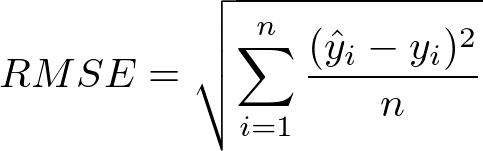